In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [1]:
import numpy as np
import pandas as pd


In [2]:
df =pd.read_csv("/content/placement.csv")

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.shape

(100, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [8]:
#preprocessing (unnamed is a column we don't really require so just remove it)

df = df.iloc[:,1:]

In [9]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [10]:
# EDA (Exploratory data analysis)
import matplotlib.pyplot as plt


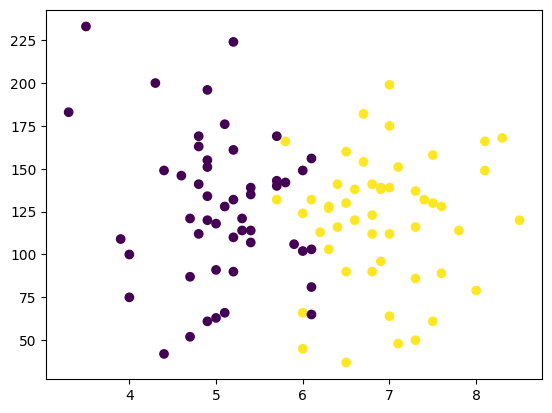

In [12]:
plt.scatter(df["cgpa"],df["iq"],c=df['placement']) # students in purple weren't placed while students in yellow have been placed

In [14]:
# Let us use logistic regression as it works well with classification problems and this graph is linearly seperable
# let us extract input(independent) and output(dependent) columns now

X = df.iloc[:,0:2] #input
Y=df.iloc[:,-1]

In [15]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [16]:
Y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1) #10 percent of my data is used for testing and 90 percent is used to train

In [19]:
X_train

,cgpa,iq
41,5.4,114.0
98,6.3,103.0
95,4.3,200.0
89,4.9,151.0
57,6.5,130.0
...,...,...
42,7.6,89.0
37,8.1,149.0
3,7.4,132.0
0,6.8,123.0


In [22]:
y_train

,placement
39,0
66,1
86,0
88,0
36,0
...,...
56,0
98,1
31,0
91,1


In [23]:
X_test

,cgpa,iq
44,7.5,61.0
99,6.2,113.0
12,5.4,139.0
59,4.8,112.0
35,6.8,90.0
95,4.3,200.0
84,5.7,169.0
92,5.2,110.0
3,7.4,132.0
80,4.9,196.0


In [24]:
y_test

,placement
44,1
99,1
12,0
59,0
35,1
95,0
84,0
92,0
3,1
80,0


In [25]:
# scaling the values

from sklearn.preprocessing import StandardScaler

In [27]:
scaler= StandardScaler()

In [36]:
X_train = scaler.fit_transform(X_train) # reducing or scaling down all the values so that they lie in the range of [-1 ,1]

In [30]:
X_train

array([[-1.23160415,  0.59498056],
       [ 0.77739553, -0.67755391],
       [-0.79486509,  0.13686815],
       [-1.40629978,  0.67133263],
       [-0.27077822,  0.44227642],
       [-0.18343041,  0.4931778 ],
       [ 1.38883021, -0.85570873],
       [ 0.51535209,  0.39137505],
       [-1.14425634, -0.04128667],
       [ 0.42800428,  0.95129021],
       [-1.40629978, -2.05189113],
       [-0.00873478,  0.67133263],
       [-0.8822129 , -0.80480735],
       [ 0.69004772,  0.0096147 ],
       [ 0.07861303, -1.05931425],
       [-0.70751728,  2.58013433],
       [ 1.38883021,  0.13686815],
       [ 0.95209115, -1.899187  ],
       [-2.36712571,  1.53665607],
       [ 0.6026999 ,  0.79858607],
       [-1.05690853,  1.02764228],
       [-1.75569103, -1.21201838],
       [-0.96956072, -0.06673736],
       [-1.05690853,  0.46772711],
       [-0.70751728,  0.9767409 ],
       [ 0.07861303, -0.49939908],
       [ 0.77739553,  0.39137505],
       [ 1.82556928,  1.10399435],
       [ 0.86474334,

In [38]:
X_test = scaler.transform(X_test)

In [39]:
X_test

array([[  7.5,  61. ],
       [  6.2, 113. ],
       [  5.4, 139. ],
       [  4.8, 112. ],
       [  6.8,  90. ],
       [  4.3, 200. ],
       [  5.7, 169. ],
       [  5.2, 110. ],
       [  7.4, 132. ],
       [  4.9, 196. ]])

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
clf = LogisticRegression()

In [43]:
clf.fit(X_train,y_train) # this is used to train our logistic regression model(any model infact)

LogisticRegression()

In [46]:
# Model Evaluation
y_pred= clf.predict(X_test)

In [47]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [45]:
y_test

,placement
44,1
99,1
12,0
59,0
35,1
95,0
84,0
92,0
3,1
80,0


In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test,y_pred)

0.4

In [52]:
# to plot decision boundry
!pip install mlxtend


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 25.4 MB/s eta 0:00:00


In [53]:
from mlxtend.plotting import plot_decision_regions



<Axes: >

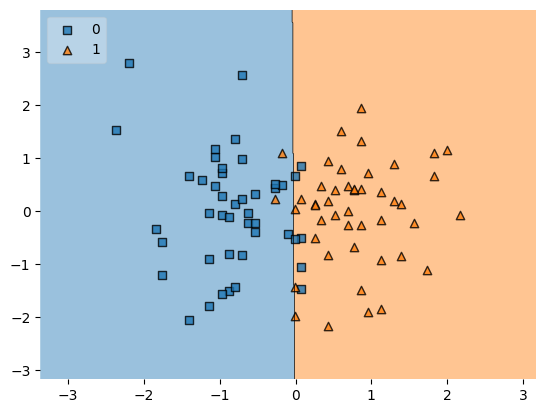

In [58]:
plot_decision_regions(X_train, y_train.values ,clf=clf,legend=2)

In [59]:
import pickle # converts objects to files that can be used in any environment

In [61]:
pickle.dump(clf,open('model.pkl','wb')) # in write binary mode a file called model.pkl is being opened that is incorporated with clf data